In [653]:
import xarray as xr

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from bs_fdbck.constants import path_extract_latlon_outdata
from dask.diagnostics import ProgressBar
import seaborn as sns

In [654]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [655]:
from bs_fdbck.util.BSOA_datamanip import compute_total_tau, broadcase_station_data, change_units_and_compute_vars, \
    get_dic_df_mod

In [656]:
def make_fn(case, v_x, v_y, comment=''):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'dist_plots_f09_f09_allyears_Nx{comment}_{case}_{_x}_{_y}.png'
    return plot_path /f



In [657]:
plot_path = Path('Plots')

In [658]:
xr.set_options(keep_attrs=True) 

## Get observational data

In [659]:
import pandas as pd

In [660]:
import pandas as pd

In [661]:
from bs_fdbck.constants import path_measurement_data

In [662]:
from bs_fdbck.constants import path_measurement_data

In [663]:
fn = path_measurement_data / 'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=4, header=1,)# usecols=range(7,12),nrows=7)

df_hyy_1.head()
#df_hyy_1y= df_hyy_1y.rename({'year.1':'year',
#                            'T (degree C).1':'T (degree C)',
#                             'OA (microgram m^-3).1':'OA (microgram m^-3)',
#                             'N100 (cm^-3).1':'N100 (cm^-3)'
#                            }, axis=1)
#df_hyy_1y['year'] = pd.to_datetime(df_hyy_1y['year'].apply(x:str(x)))

df_hyy_1

year  month  day   LAT   LON  OA (microgram m^-3)  CWP (g m^-2)  \
0     2012      7    5  60.5  22.5             3.218589           191   
1     2012      7   10  60.5  22.5             4.714353           172   
2     2012      7   14  60.5  22.5             1.451827           106   
3     2012      7   19  60.5  22.5             3.101941           262   
4     2012      7   22  60.5  22.5             0.875789            92   
...    ...    ...  ...   ...   ...                  ...           ...   
3668  2018      8   13  65.5  29.5             0.674785           191   
3669  2018      8   14  65.5  29.5             1.356364           291   
3670  2018      8   19  65.5  29.5             0.916047           139   
3671  2018      8   20  65.5  29.5             1.325436           177   
3672  2018      8   27  65.5  29.5             0.823307           141   

      CER (micrometer)        COT  
0            12.940000  26.219999  
1            10.950000  24.430000  
2            15.790000  12.030000  
3            16.039999  28.650000  
4            10.630000  14.820000  
...                ...        ...  
3668         15.200000  18.969999  
3669         15.200000  31.449999  
3670         18.230000  11.960000  
3671         14.049999  19.869999  
3672         17.430000  13.030000  

[3673 rows x 9 columns]

In [664]:
import pandas as pd

In [665]:
df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )

In [666]:
df_hyy_1 = df_hyy_1.set_index(['date','LAT','LON'])

## Pick up sizedist info as well

In [667]:
df_hyy_2 = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))
df_hyy_2['date'] = df_hyy_2.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_2['date'] = pd.to_datetime(df_hyy_2['date'] )



In [668]:
from bs_fdbck.util.EBAS_data import get_ebas_dataset_Nx_daily_JA_median_df



df_ebas_Nx, ds_ebas_Nx = get_ebas_dataset_Nx_daily_JA_median_df()#x_list = [90,100,110,120])

Importing files: 
[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20120101000000.20181205100800.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20130101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20140101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20150101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20160101000000.2022022

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:199: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_JA.mean()
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:202: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_JA.median())


In [669]:

df_hyy_2['date'] = df_hyy_2.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_2['date'] = pd.to_datetime(df_hyy_2['date'] )


df_hyy_2 = df_hyy_2.set_index('date')

In [670]:
df_hyy_2.index = df_hyy_2.index.rename('time')

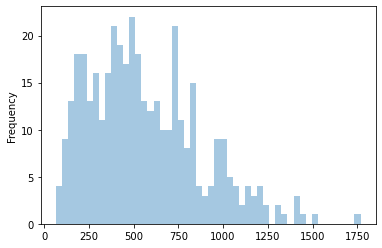

In [671]:
df_hyy_2['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')

plt.show()



## Why is my method 20% off their method? Is it integration?

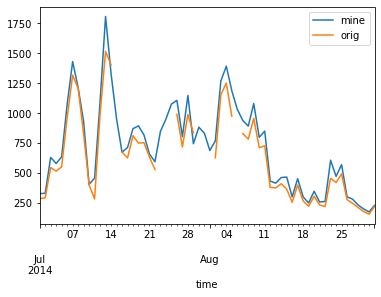

1.13207410632531


In [672]:

df_joint_hyy = pd.merge(df_ebas_Nx, df_hyy_2, left_index=True, right_index=True)
(df_joint_hyy['N100']).loc['2014-07':'2014-09'].plot(label='mine')
(df_joint_hyy['N100 (cm^-3)']).loc['2014-07':'2014-09'].plot(label='orig')
plt.legend()
plt.show()



print(df_joint_hyy['N100'][df_joint_hyy['N100 (cm^-3)'].notnull()].mean()/df_joint_hyy['N100 (cm^-3)'].mean())

In [673]:
df_hyy_1

year  month  day  OA (microgram m^-3)  CWP (g m^-2)  \
date       LAT  LON                                                         
2012-07-05 60.5 22.5  2012      7    5             3.218589           191   
2012-07-10 60.5 22.5  2012      7   10             4.714353           172   
2012-07-14 60.5 22.5  2012      7   14             1.451827           106   
2012-07-19 60.5 22.5  2012      7   19             3.101941           262   
2012-07-22 60.5 22.5  2012      7   22             0.875789            92   
...                    ...    ...  ...                  ...           ...   
2018-08-13 65.5 29.5  2018      8   13             0.674785           191   
2018-08-14 65.5 29.5  2018      8   14             1.356364           291   
2018-08-19 65.5 29.5  2018      8   19             0.916047           139   
2018-08-20 65.5 29.5  2018      8   20             1.325436           177   
2018-08-27 65.5 29.5  2018      8   27             0.823307           141   

                      CER (micrometer)        COT  
date       LAT  LON                                
2012-07-05 60.5 22.5         12.940000  26.219999  
2012-07-10 60.5 22.5         10.950000  24.430000  
2012-07-14 60.5 22.5         15.790000  12.030000  
2012-07-19 60.5 22.5         16.039999  28.650000  
2012-07-22 60.5 22.5         10.630000  14.820000  
...                                ...        ...  
2018-08-13 65.5 29.5         15.200000  18.969999  
2018-08-14 65.5 29.5         15.200000  31.449999  
2018-08-19 65.5 29.5         18.230000  11.960000  
2018-08-20 65.5 29.5         14.049999  19.869999  
2018-08-27 65.5 29.5         17.430000  13.030000  

[3673 rows x 7 columns]

In [674]:
take_vars = ['N50','N100','N150','N200','N100 (cm^-3)']

In [675]:
import numpy as np

In [676]:
for v in take_vars:
    df_hyy_1[v] = np.nan

for d in df_hyy_1.index.get_level_values(0).unique():
    #print(d)
    for v in take_vars:
        df_hyy_1.loc[d,v] = df_joint_hyy.loc[d,v]

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2898: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


In [677]:
import pandas as pd

In [678]:
df_hyy_1

year  month  day  OA (microgram m^-3)  CWP (g m^-2)  \
date       LAT  LON                                                         
2012-07-05 60.5 22.5  2012      7    5             3.218589           191   
2012-07-10 60.5 22.5  2012      7   10             4.714353           172   
2012-07-14 60.5 22.5  2012      7   14             1.451827           106   
2012-07-19 60.5 22.5  2012      7   19             3.101941           262   
2012-07-22 60.5 22.5  2012      7   22             0.875789            92   
...                    ...    ...  ...                  ...           ...   
2018-08-13 65.5 29.5  2018      8   13             0.674785           191   
2018-08-14 65.5 29.5  2018      8   14             1.356364           291   
2018-08-19 65.5 29.5  2018      8   19             0.916047           139   
2018-08-20 65.5 29.5  2018      8   20             1.325436           177   
2018-08-27 65.5 29.5  2018      8   27             0.823307           141   

                      CER (micrometer)        COT          N50         N100  \
date       LAT  LON                                                           
2012-07-05 60.5 22.5         12.940000  26.219999  1882.260561  1171.607041   
2012-07-10 60.5 22.5         10.950000  24.430000  1375.178130   814.388599   
2012-07-14 60.5 22.5         15.790000  12.030000  1389.196298   541.138041   
2012-07-19 60.5 22.5         16.039999  28.650000  1278.081813   525.575887   
2012-07-22 60.5 22.5         10.630000  14.820000  1196.501677   318.745450   
...                                ...        ...          ...          ...   
2018-08-13 65.5 29.5         15.200000  18.969999   660.360677   145.197076   
2018-08-14 65.5 29.5         15.200000  31.449999  1510.333838   274.108194   
2018-08-19 65.5 29.5         18.230000  11.960000   928.425821   263.454773   
2018-08-20 65.5 29.5         14.049999  19.869999  1818.758503   457.107079   
2018-08-27 65.5 29.5         17.430000  13.030000  1280.336343   454.159344   

                            N150        N200  N100 (cm^-3)  
date       LAT  LON                                         
2012-07-05 60.5 22.5  500.573868  161.543271   1019.238450  
2012-07-10 60.5 22.5  487.495452  278.449987    718.753235  
2012-07-14 60.5 22.5  276.046402  127.961418    474.316941  
2012-07-19 60.5 22.5  241.957634  113.605767    439.855305  
2012-07-22 60.5 22.5  144.101416   57.666098    194.680692  
...                          ...         ...           ...  
2018-08-13 65.5 29.5   88.444138   43.055008    129.257462  
2018-08-14 65.5 29.5  129.094373   73.241446    217.841378  
2018-08-19 65.5 29.5  125.417612   54.348292    245.150873  
2018-08-20 65.5 29.5  138.325120   52.780056    405.458829  
2018-08-27 65.5 29.5  139.446334   47.798069    423.684130  

[3673 rows x 12 columns]

In [679]:
for v in take_vars:
    df_hyy_1[f'{v}_low'] = df_hyy_1[v]<df_hyy_1[v].quantile(.34)
    df_hyy_1[f'{v}_high']= df_hyy_1[v]>df_hyy_1[v].quantile(.66)
    df_hyy_1[f'{v}_category'] = pd.NA#df_hyy_1.assign(OA_category= pd.NA)

    df_hyy_1.loc[df_hyy_1[f'{v}_high'], f'{v}_category'] = f'{v} high'
    df_hyy_1.loc[df_hyy_1[f'{v}_low'], f'{v}_category'] = f'{v} low'

In [680]:
#df_hyy_1['OA_category']

df_hyy_1['OA_low'] = df_hyy_1['OA (microgram m^-3)']<2
df_hyy_1['OA_high']= df_hyy_1['OA (microgram m^-3)']>2

ddf_hyy_1=df_hyy_1.assign(OA_category= pd.NA)
df_hyy_1.loc[df_hyy_1['OA_high'], 'OA_category'] = 'OA high'
df_hyy_1.loc[df_hyy_1['OA_low'], 'OA_category'] = 'OA low'



In [681]:
bins = pd.IntervalIndex.from_tuples([(60, 100), (100, 140), (140, 180), (180, 220), (220, 260), (260, 300), (300, 340)])

In [682]:
labels=[ 80, 120, 160, 200, 240, 280, 320]

In [683]:
df_hyy_1['CWP_cut']=pd.cut(df_hyy_1['CWP (g m^-2)'], bins=bins, labels=labels)
df_hyy_1['CWP_qcut']=pd.qcut(df_hyy_1['CWP (g m^-2)'], 6)#bins=bins, labels=labels)

In [684]:
df_hyy_1['CWP_qcutl'] = df_hyy_1['CWP_qcut'].apply(lambda x:x.mid)

df_hyy_1['CWP_cutl'] = df_hyy_1['CWP_cut'].apply(lambda x:x.mid)

<AxesSubplot:ylabel='Frequency'>

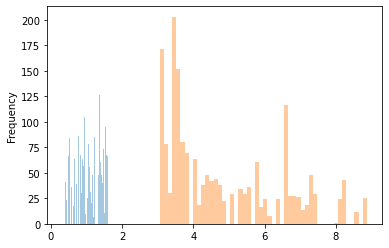

In [685]:
df_hyy_1['OA (microgram m^-3)'][df_hyy_1['OA_low']].plot.hist(bins=50, alpha=0.4, label='obs')
df_hyy_1['OA (microgram m^-3)'][df_hyy_1['OA_high']].plot.hist(bins=50, alpha=0.4, label='obs')



<AxesSubplot:ylabel='Frequency'>

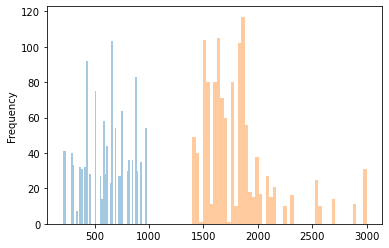

In [686]:
df_hyy_1['N50'][df_hyy_1['N50_low']].plot.hist(bins=50, alpha=0.4, label='obs')
df_hyy_1['N50'][df_hyy_1['N50_high']].plot.hist(bins=50, alpha=0.4, label='obs')



## Get model data:

## Get station vars:

In [687]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter

log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

In [688]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [689]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [690]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

### Cases:

In [691]:
cases_orig1 = ['OsloAero_intBVOC_f19_f19_mg17_full']
cases_orig2 = ['OsloAero_intBVOC_f19_f19_mg17_ssp245']

In [692]:
case_mod = 'OsloAero_intBVOC_f19_f19_mg17_fssp'

### Variables

In [693]:

varl =['NCONC01','N50','N100','N150','N200',
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3',
      ]

In [694]:
for case_name in cases_orig1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS


In [695]:
for case_name in cases_orig2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS


In [696]:
dic_ds = dict()
for ca in cases_orig1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-05-04 23:25:27,255 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/NCONC01_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N50_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N150_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N200_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/NCONC01_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N50_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N150_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N200_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/

In [697]:
#dic_ds = dict()
for ca in cases_orig2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-05-04 23:25:27,914 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/NCONC01_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N50_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N100_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N150_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N200_OsloAero_intBVOC_f19_f19_mg17

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/NCONC01_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N50_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N100_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N150_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N200_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/b

In [698]:
case1 = cases_orig1[0]
case2 = cases_orig2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

from_t

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb_station = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

2012 2014 2015 2019


In [699]:
mid_y_f

'2015'

## Get full grid vars:


### Settings

In [700]:
lat_smr = 61.85
lon_smr = 24.28
model_lev_i=-1

In [701]:
temperature = 273.15  # K

In [702]:
case_name = 'OsloAero_intBVOC_f09_f09_mg17_fssp245'

from_time1 = '2012-01-01'
to_time1 = '2015-01-01'
from_time2 ='2015-01-01'
to_time2 ='2019-01-01'
sel_years_from_files = [
    '2012-01-01',
    '2014-12-31',
    '2015-01-01',
    '2018-12-31',

]

In [703]:
case_name = 'OsloAero_intBVOC_f09_f09_mg17_fssp245'

case_name1 = 'OsloAero_intBVOC_f09_f09_mg17_full'
case_name2 = 'OsloAero_intBVOC_f09_f09_mg17_ssp245'

In [704]:
fn1 = path_extract_latlon_outdata/ case_name1/f'{case_name1}.h1._{from_time1}-{to_time1}_concat_subs_22.0-30.0_60.0-66.0.nc'
fn1_2 = fn1.parent / f'{fn1.stem}_sort.nc'
fn1_3 = fn1.parent / f'{fn1.stem}_sort3.nc'

fn2 = path_extract_latlon_outdata/ case_name2/f'{case_name2}.h1._{from_time2}-{to_time2}_concat_subs_22.0-30.0_60.0-66.0.nc'

fn2_2 = fn2.parent / f'{fn2.stem}_sort.nc'
fn2_3 = fn2.parent / f'{fn2.stem}_sort3.nc'

fn_comb =path_extract_latlon_outdata / case_name /f'{case_name}.h1._{from_time1}-{to_time2}_concat_subs_22.0-30.0_60.0-66.0.nc'
fn_comb_lev1 = path_extract_latlon_outdata/ case_name/f'{case_name}.h1._{from_time1}-{to_time2}_concat_subs_22.0-30.0_60.0-66.0_lev1.nc'
fn_comb_lev1_final = path_extract_latlon_outdata/ case_name/f'{case_name}.h1._{from_time1}-{to_time2}_concat_subs_22.0-30.0_60.0-66.0_lev1_final.nc'
fn_comb_lev1_finaler = path_extract_latlon_outdata/ case_name/f'{case_name}.h1._2012-01-01-2015-01-01_concat_subs_22.0-30.0_60.0-66.0_lev1_finaler.nc'
fn_comb_lev1_final_csv = path_extract_latlon_outdata/ case_name/f'{case_name}.h1._{from_time1}-{to_time2}_concat_subs_22.0-30.0_60.0-66.0_lev1_final.csv'

In [705]:

cases = [case_name]

In [706]:
varl =['DOD500','DOD440','ACTREL','ACTNL','TGCLDLWP', #,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T'
       ,'FCTL',
       'TOT_CLD_VISTAU','TOT_ICLD_VISTAU','TGCLDCWP',
       'CLDFREE',
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
       'FSDSC','FSDSCDRF',
       'N50','N100','N150','N200'
      ]

## Station variables

In [707]:
varl_st = [      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3',
                 ]


varl_cl = ['TOT_CLD_VISTAU','TOT_ICLD_VISTAU','TGCLDCWP','TGCLDLWP','TGCLDIWP',
           'TOT_CLD_VISTAU_s','TOT_ICLD_VISTAU_s','optical_depth',
           'CLDFREE',
           'FCTL',
           'ACTREL','ACTNL','TGCLDLWP',
           'FSDSC','FSDSCDRF',
           'FCTI',
           'FCTL',
           'FLNS',
           'FLNSC',
           'FLNT',
           'FLNTCDRF',
           'FLNT_DRF',
           'FLUS',
           'FLUTC','FORMRATE',
           'FREQI',
           'FREQL',
           'FSDSCDRF',
           'FSDS_DRF',
           'FSNS',
           'FSNSC',
           'FSNT',
           'FSNTCDRF',
           'FSNT_DRF',
           'FSUS_DRF',
           'FSUTADRF',
           ]

## If file not already createad already, skip this part

In [708]:
fn_comb_lev1.exists()

True

In [709]:
if not fn_comb.exists():
    if (not fn1_2.exists()) or (not fn2_2.exists()):
        ds_mod1 = xr.open_dataset(fn1, chunks = {'time':48})#[fn1,fn2])#.sortby('time')
        ds_mod2 = xr.open_dataset(fn2, chunks = {'time':48})

        varl1 = set(ds_mod1.data_vars)

        varl2 = set(ds_mod2.data_vars)


        varl =list(varl1.intersection(varl2))

        ds_mod1 = ds_mod1[varl].sel(time=slice(sel_years_from_files[0],sel_years_from_files[1]))#.sortby('time')

        ds_mod2 = ds_mod2[varl].sel(time=slice(sel_years_from_files[2],sel_years_from_files[3]))#.sortby('time')
        print('HEEEEY')
        if not fn1_2.exists():
            delayed_obj = ds_mod1.to_netcdf(fn1_2, compute=False)
            with ProgressBar():
                results = delayed_obj.compute()
        if not fn2_2.exists():
            delayed_obj = ds_mod2.to_netcdf(fn2_2, compute=False)
            with ProgressBar():
                results = delayed_obj.compute()
    
    if not fn1_3.exists():
            ds_mod1 = xr.open_dataset(fn1_2, chunks = {'time':48})#[fn1,fn2])#.sortby('time')
            ds_mod1 = compute_total_tau(ds_mod1)
            ds_mod1 = ds_mod1.isel(lev = model_lev_i)
            ds_mod1 = ds_mod1.sortby('time')#.sel(time=slice('2012','2014'))
            delayed_obj = ds_mod1.to_netcdf(fn1_3, compute=False)
            print('hey 1')
            with ProgressBar():
                results = delayed_obj.compute()
    if not fn2_3.exists():
            ds_mod2 = xr.open_dataset(fn2_2, chunks = {'time':48})#[fn1,fn2])#.sortby('time')
            ds_mod2 = compute_total_tau(ds_mod2)
            ds_mod2 = ds_mod2.isel(lev = model_lev_i)
            ds_mod2 = ds_mod2.sortby('time')#.sel(time=slice('2012','2014'))
            delayed_obj = ds_mod2.to_netcdf(fn2_3, compute=False)
            print('hey')
            with ProgressBar():
                results = delayed_obj.compute()
    
    
    ds_mod = xr.open_mfdataset([fn1_3,fn2_3], combine='by_coords', concat_dim='time')

    fn_comb.parent.mkdir(exist_ok=True,)

    delayed_obj = ds_mod.to_netcdf(fn_comb, compute = False)
    with ProgressBar():
        results = delayed_obj.compute()

    #ds_mod = xr.concat([ds_mod1[varl].sel(time=slice('2012','2014')), ds_mod2[varl].sel(time=slice('2015','2018'))], dim='time')

### Select hyytiala grid cell:
    

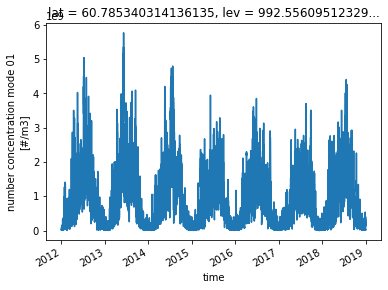

In [710]:
ds_mod = xr.open_dataset(fn_comb, chunks = {'time':48})
ds_mod['NCONC01'].isel(lat=0, lon=0).plot()

    #if not fn_comb_lev1.exists():
    ds_mod = xr.open_dataset(fn_comb, chunks = {'time':48})#[fn1,fn2])#.sortby('time')
    #ds_mod2 = xr.open_dataset(fn2, chunks = {'time':48})

    #ds_mod = compute_total_tau(ds_mod)

    #ds_mod = ds_mod.sortby('time')#.sel(time=slice('2012','2014'))

    #ds_mod = ds_mod.isel(lev = model_lev_i)


    delayed_obj = ds_mod.to_netcdf(fn_test)#, compute=False)
    #    print('hey')
    #with ProgressBar():
    #    results = delayed_obj.compute()

## If file createad already, skip to here

### Select hyytiala grid cell:

We use only hyytiala for org etc, but all grid cells over finland for cloud properties

In [711]:
fn_comb_lev1_final.exists()

True

In [712]:
if not fn_comb_lev1_final.exists():
    ds_all = xr.open_dataset(fn_comb).isel(ilev=model_lev_i)
    ds_sel = ds_all.sel(lat = lat_smr, lon= lon_smr, method='nearest')#.isel( ilev=model_lev_i)#.load()
    ds_all = ds_all.isel(
        #ilev=-1,
        # cosp_tau_modis=0,
        #                                                    cosp_tau=0,
        #                                                   cosp_dbze=0,
        #                                                    cosp_ht=0,
        #                                                    cosp_prs = 0,
        #                                                   cosp_reffice=0,
        #                                                    cosp_htmisr=0,
        #                                                    cosp_reffliq=0,
        #                                                    cosp_scol=0,
        #                                                    cosp_sr=0,
        #                                                    cosp_sza=0,
        nbnd=0
    ).squeeze()
    ds_all = broadcase_station_data(ds_all)
    ds_all = change_units_and_compute_vars(ds_all, temperature=temperature)


    delayed_obj = ds_all.to_netcdf(fn_comb_lev1_final, compute=False)
    print('hey')
    with ProgressBar():
        results = delayed_obj.compute()

In [713]:
fn_comb_lev1.exists()

True

if not fn_comb_lev1.exists():
    ds_mod = xr.open_dataset(fn_comb, chunks = {'time':48})#[fn1,fn2])#.sortby('time')
    #ds_mod2 = xr.open_dataset(fn2, chunks = {'time':48})

    #ds_mod = compute_total_tau(ds_mod)

    ds_mod = ds_mod.sortby('time')#.sel(time=slice('2012','2014'))

    #ds_mod = ds_mod.isel(lev = model_lev_i)
 

    delayed_obj = ds_mod.to_netcdf(fn_comb_lev1, compute=False)
    print('hey')
    with ProgressBar():
        results = delayed_obj.compute()

## If file createad already, skip to here

### Select hyytiala grid cell:

We use only hyytiala for org etc, but all grid cells over finland for cloud properties

In [714]:
if not fn_comb_lev1_final.exists():
    ds_all = xr.open_dataset(fn_comb).isel(ilev=model_lev_i)
    ds_sel = ds_all.sel(lat = lat_smr, lon= lon_smr, method='nearest')#.isel( ilev=model_lev_i)#.load()
    ds_all = ds_all.isel(
        #ilev=-1,
        # cosp_tau_modis=0,
        #                                                    cosp_tau=0,
        #                                                   cosp_dbze=0,
        #                                                    cosp_ht=0,
        #                                                    cosp_prs = 0,
        #                                                   cosp_reffice=0,
        #                                                    cosp_htmisr=0,
        #                                                    cosp_reffliq=0,
        #                                                    cosp_scol=0,
        #                                                    cosp_sr=0,
        #                                                    cosp_sza=0,
        nbnd=0
    ).squeeze()
    ds_all = broadcase_station_data(ds_all)
    ds_all = change_units_and_compute_vars(ds_all, temperature=temperature)


    delayed_obj = ds_all.to_netcdf(fn_comb_lev1_final, compute=False)
    print('hey')
    with ProgressBar():
        results = delayed_obj.compute()

### Broadcast ds_sel to same grid

In [715]:

ds_all = xr.open_dataset(fn_comb_lev1_final)

## Combine station and full grid data for model:

In [716]:
ds_comb_smr

<xarray.Dataset>
Dimensions:  (time: 61345)
Coordinates:
    lev      float64 992.6
  * time     (time) datetime64[ns] 2012-01-02 2012-01-02T01:00:00 ... 2019-01-01
    station  <U3 'SMR'
Data variables: (12/25)
    BC_A     (time) float32 6.432e-11 6.423e-11 6.63e-11 ... 2.102e-11 2.124e-11
    BC_AC    (time) float32 6.741e-13 7.021e-13 8.773e-13 ... 2.273e-12 2.12e-12
    BC_AI    (time) float32 6.872e-12 6.667e-12 ... 1.619e-12 1.665e-12
    BC_AX    (time) float32 1.514e-11 1.519e-11 1.509e-11 ... 4.03e-12 3.429e-12
    BC_N     (time) float32 1.103e-10 1.111e-10 1.13e-10 ... 2.034e-11 1.6e-11
    BC_NI    (time) float32 9.365e-17 1.412e-16 ... 4.554e-17 2.366e-17
    ...       ...
    SO4_PR   (time) float32 1.216e-10 1.287e-10 ... 6.051e-12 4.739e-12
    SOA_A1   (time) float32 4.379e-11 4.143e-11 ... 8.905e-12 8.198e-12
    SOA_NA   (time) float32 6.64e-13 6.21e-13 6.381e-13 ... 5.855e-13 6.991e-13
    SS_A1    (time) float32 2.746e-11 2.991e-11 3.613e-11 ... 4.7e-11 3.558e-11
    SS_A2    (time) float32 1.383e-10 1.59e-10 2.033e-10 ... 2.104e-10 1.57e-10
    SS_A3    (time) float32 2.97e-10 3.733e-10 4.739e-10 ... 4.973e-10 3.875e-10

In [717]:
if not fn_comb_lev1_finaler.exists():
    ds_all = xr.open_dataset(fn_comb_lev1_final)
    _, index = np.unique(ds_all['time'], return_index=True)
    index


    ds_all = ds_all.isel(time=index)
    ds_all =  ds_all.sel(time=slice('2012-07',None))

    ds_all

    ds_comb_smr = ds_comb_station.sel(station='SMR').drop('NCONC01')

    ds_comb_smr = ds_comb_smr.sel(time=slice(from_time1,None)).isel(lev=-1)
    ds_comb_smr

    ds_comb_smr.load()
    ds_all.load()
    drop_vars = set(ds_comb_smr.data_vars).intersection(set(ds_all.data_vars))
    print('Dropping following data from full grid:')
    print(drop_vars)
    (ds1, _)= xr.broadcast(ds_comb_smr, ds_all.drop(drop_vars))

    ds1['N100'].isel(time=slice(1,400)).mean('lon').plot()

    ds_all_merged = xr.merge([ds_all.drop(drop_vars),ds1])

    ds_all_merged.to_netcdf(fn_comb_lev1_finaler)


#dic_df = get_dic_df_mod()

In [718]:
ds_all = xr.open_dataset(fn_comb_lev1_finaler)

ds_all = ds_all.drop(['ilev','lev','station'])

In [719]:
ds_all

<xarray.Dataset>
Dimensions:            (time: 61345, lat: 6, lon: 7)
Coordinates:
  * time               (time) datetime64[ns] 2012-01-02 ... 2019-01-01
    ilev               float64 ...
  * lat                (lat) float64 60.79 61.73 62.67 63.61 64.55 65.5
    lev                float64 ...
  * lon                (lon) float64 22.5 23.75 25.0 26.25 27.5 28.75 30.0
    station            object ...
Data variables: (12/195)
    NMR13              (time, lat, lon) float32 ...
    nscur              (time) int32 ...
    hybm               (time) float64 ...
    T                  (time, lat, lon) float32 ...
    EC550AER           (time, lat, lon) float32 ...
    FLNS               (time, lat, lon) float32 ...
    ...                 ...
    SO4_PR             (time, lat, lon) float32 ...
    SOA_A1             (time, lat, lon) float32 ...
    SOA_NA             (time, lat, lon) float32 ...
    SS_A1              (time, lat, lon) float32 ...
    SS_A2              (time, lat, lon) float32 ...
    SS_A3              (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_f09_f09_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      spinup_freemet_f09_f09_mg17_from2000.cam.i.2011-01-01-...
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Mon Apr 11 21:44:12 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

In [720]:
ds_all.load()

<xarray.Dataset>
Dimensions:            (time: 61345, lat: 6, lon: 7)
Coordinates:
  * time               (time) datetime64[ns] 2012-01-02 ... 2019-01-01
    ilev               float64 1e+03
  * lat                (lat) float64 60.79 61.73 62.67 63.61 64.55 65.5
    lev                float64 992.6
  * lon                (lon) float64 22.5 23.75 25.0 26.25 27.5 28.75 30.0
    station            <U3 'SMR'
Data variables: (12/195)
    NMR13              (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    nscur              (time) int32 -2147483648 -2147483648 ... -2147483648
    hybm               (time) float64 nan nan nan nan ... 0.9926 0.9926 nan
    T                  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    EC550AER           (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    FLNS               (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    ...                 ...
    SO4_PR             (time, lat, lon) float32 1.216e-10 ... 4.739e-12
    SOA_A1             (time, lat, lon) float32 4.379e-11 ... 8.198e-12
    SOA_NA             (time, lat, lon) float32 6.64e-13 6.64e-13 ... 6.991e-13
    SS_A1              (time, lat, lon) float32 2.746e-11 ... 3.558e-11
    SS_A2              (time, lat, lon) float32 1.383e-10 1.383e-10 ... 1.57e-10
    SS_A3              (time, lat, lon) float32 2.97e-10 2.97e-10 ... 3.875e-10
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_f09_f09_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      spinup_freemet_f09_f09_mg17_from2000.cam.i.2011-01-01-...
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Mon Apr 11 21:44:12 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

In [721]:
dic_ds = dict()
dic_ds[case_name] =ds_all



In [722]:
dic_ds['OsloAero_intBVOC_f09_f09_mg17_fssp245']

<xarray.Dataset>
Dimensions:            (time: 61345, lat: 6, lon: 7)
Coordinates:
  * time               (time) datetime64[ns] 2012-01-02 ... 2019-01-01
    ilev               float64 1e+03
  * lat                (lat) float64 60.79 61.73 62.67 63.61 64.55 65.5
    lev                float64 992.6
  * lon                (lon) float64 22.5 23.75 25.0 26.25 27.5 28.75 30.0
    station            <U3 'SMR'
Data variables: (12/195)
    NMR13              (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    nscur              (time) int32 -2147483648 -2147483648 ... -2147483648
    hybm               (time) float64 nan nan nan nan ... 0.9926 0.9926 nan
    T                  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    EC550AER           (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    FLNS               (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    ...                 ...
    SO4_PR             (time, lat, lon) float32 1.216e-10 ... 4.739e-12
    SOA_A1             (time, lat, lon) float32 4.379e-11 ... 8.198e-12
    SOA_NA             (time, lat, lon) float32 6.64e-13 6.64e-13 ... 6.991e-13
    SS_A1              (time, lat, lon) float32 2.746e-11 ... 3.558e-11
    SS_A2              (time, lat, lon) float32 1.383e-10 1.383e-10 ... 1.57e-10
    SS_A3              (time, lat, lon) float32 2.97e-10 2.97e-10 ... 3.875e-10
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_f09_f09_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      spinup_freemet_f09_f09_mg17_from2000.cam.i.2011-01-01-...
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Mon Apr 11 21:44:12 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

In [723]:
type(df_hyy_1.index) is pd.MultiIndex

True

In [724]:
if not fn_comb_lev1_final_csv.exists():
    dic_df = get_dic_df_mod(dic_ds, select_hours_clouds=True)

    df_mod = dic_df[case_name]
    df_mod.to_csv(fn_comb_lev1_final_csv)

In [725]:
df_mod = pd.read_csv(fn_comb_lev1_final_csv, index_col=[0,1,2] )

In [726]:
df_mod['N50']

time        lat        lon  
2012-01-02  60.785340  22.50   NaN
                       23.75   NaN
                       25.00   NaN
                       26.25   NaN
                       27.50   NaN
                                ..
2019-01-01  65.497382  25.00   NaN
                       26.25   NaN
                       27.50   NaN
                       28.75   NaN
                       30.00   NaN
Name: N50, Length: 107394, dtype: float64

df_modean data:

### Remove gridcells that don't have a lot of cloud?

In [727]:
df_mod = df_mod#[df_mod['CLDFREE']<.5]#.index.get_level_values(1)

### Remove grid vells with no cloud top liquid

In [728]:
mask_liq_cloudtop = (df_mod['FCTL']>0.1) & (df_mod['FCTL']/(df_mod['FCTL']+df_mod['FCTI'])>.8)

df_mod.loc[:,'mask_liq_cloudtop'] = mask_liq_cloudtop

In [729]:
one_gc = (df_mod.index.get_level_values(1)==61.57894736842104) & (df_mod.index.get_level_values(2) ==30.0)

In [730]:
df_mod.index.get_level_values(1)

Float64Index([60.785340314136135, 60.785340314136135, 60.785340314136135,
              60.785340314136135, 60.785340314136135, 60.785340314136135,
              60.785340314136135,  61.72774869109946,  61.72774869109946,
               61.72774869109946,
              ...
               64.55497382198953,  64.55497382198953,  64.55497382198953,
               65.49738219895289,  65.49738219895289,  65.49738219895289,
               65.49738219895289,  65.49738219895289,  65.49738219895289,
               65.49738219895289],
             dtype='float64', name='lat', length=107394)

In [731]:
_ma = mask_liq_cloudtop[one_gc]

<AxesSubplot:xlabel='time'>

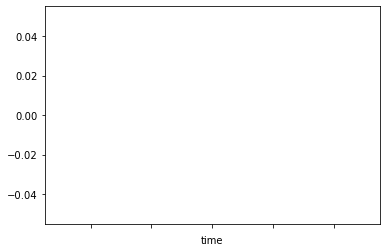

In [732]:
df_mod[one_gc][_ma].reset_index().set_index('time')['FCTL'].plot()#ylim=[-.0,.01])

In [733]:
_df = df_mod.reset_index()

In [734]:
df_mod = df_mod[df_mod['mask_liq_cloudtop']]

## Cloud water path above 50

In [735]:
mask_cl_waterpath = df_mod['TGCLDCWP_incld']>50

In [736]:
df_mod = df_mod[df_mod['mask_liq_cloudtop']& mask_cl_waterpath]

In [737]:
len(df_mod)

1443

## Group by cloud water path

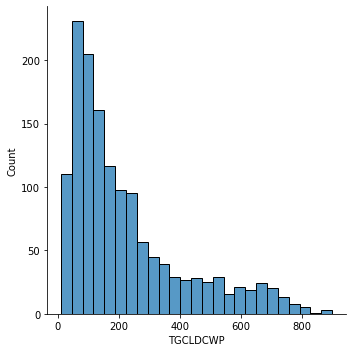

In [738]:
#_df = ((df_mod['TOT_ICLD_VISTAU_s']>1))
_df = df_mod[df_mod['TGCLDCWP']>10]
sns.displot(#x='TGCLDLWP',
            x='TGCLDCWP',
            data=_df,
            #hue='OA_category',
           #kind='swarm'
           )
#plt.ylim([0,250])

In [739]:
df_mod['CWP_qcut']=pd.qcut(df_mod['TGCLDCWP'],6)# bins=bins, labels=labels)§

df_mod['CWP_qcutl'] = df_mod['CWP_qcut'].apply(lambda x:x.mid)



In [741]:
bins = pd.IntervalIndex.from_breaks([   50,  80,  110, 140, 170, 200,230, 500])


df_mod['CWP_cut']=pd.cut(df_mod['TGCLDCWP_incld'], bins=bins)#, labels=labels)

df_mod['CWP_cutl'] = df_mod['CWP_cut'].apply(lambda x:x.mid)

## Category of OA concentration

In [742]:
df_mod

NMR13    nscur      hybm          T  \
time       lat       lon                                                 
2012-07-01 65.497382 30.00  4.000000e-08  41400.0  0.992556  288.77435   
2012-07-07 60.785340 26.25  4.000000e-08  41400.0  0.992556  297.55450   
2012-07-09 61.727749 26.25  4.000000e-08  41400.0  0.992556  291.94952   
                     27.50  4.000000e-08  41400.0  0.992556  292.32513   
                     28.75  4.000000e-08  41400.0  0.992556  292.66640   
...                                  ...      ...       ...        ...   
2018-08-30 60.785340 28.75  4.000000e-08  41400.0  0.992556  289.17468   
           61.727749 26.25  4.000000e-08  41400.0  0.992556  288.28677   
                     27.50  4.000000e-08  41400.0  0.992556  288.91602   
2018-08-31 60.785340 30.00  4.000000e-08  41400.0  0.992556  290.03632   
           61.727749 30.00  4.000000e-08  41400.0  0.992556  289.49854   

                            EC550AER       FLNS       FSNS       DER  \
time       lat       lon                                               
2012-07-01 65.497382 30.00  0.000031  68.143890  400.31740  0.155360   
2012-07-07 60.785340 26.25  0.000012  64.573210  418.85820  0.083828   
2012-07-09 61.727749 26.25  0.000031   9.819840   84.90889  0.099537   
                     27.50  0.000050  11.722922  116.66990  0.103905   
                     28.75  0.000064  12.627633  119.28713  0.109467   
...                              ...        ...        ...       ...   
2018-08-30 60.785340 28.75  0.000046  29.316982  185.99379  0.098528   
           61.727749 26.25  0.000037  18.233671  134.55083  0.099349   
                     27.50  0.000032  31.378530  243.70440  0.095488   
2018-08-31 60.785340 30.00  0.000039  53.650850  285.90945  0.116459   
           61.727749 30.00  0.000063  22.385870  154.23262  0.123855   

                                  CCN3    SFisoprene  ...  isSummer    ilev  \
time       lat       lon                              ...                     
2012-07-01 65.497382 30.00   60.049202  9.222134e-12  ...       1.0  1000.0   
2012-07-07 60.785340 26.25   88.330500  1.900346e-11  ...       1.0  1000.0   
2012-07-09 61.727749 26.25  112.164740  2.738987e-12  ...       1.0  1000.0   
                     27.50  162.920930  3.552534e-12  ...       1.0  1000.0   
                     28.75  179.101430  4.414217e-12  ...       1.0  1000.0   
...                                ...           ...  ...       ...     ...   
2018-08-30 60.785340 28.75  175.360690  2.980086e-12  ...       1.0  1000.0   
           61.727749 26.25  136.605200  6.335584e-13  ...       1.0  1000.0   
                     27.50  129.956480  1.225983e-12  ...       1.0  1000.0   
2018-08-31 60.785340 30.00  257.256470  2.411277e-12  ...       1.0  1000.0   
           61.727749 30.00  287.039060  1.430729e-12  ...       1.0  1000.0   

                                   lev  station  year  mask_liq_cloudtop  \
time       lat       lon                                                   
2012-07-01 65.497382 30.00  992.556095      SMR  2012               True   
2012-07-07 60.785340 26.25  992.556095      SMR  2012               True   
2012-07-09 61.727749 26.25  992.556095      SMR  2012               True   
                     27.50  992.556095      SMR  2012               True   
                     28.75  992.556095      SMR  2012               True   
...                                ...      ...   ...                ...   
2018-08-30 60.785340 28.75  992.556095      SMR  2018               True   
           61.727749 26.25  992.556095      SMR  2018               True   
                     27.50  992.556095      SMR  2018               True   
2018-08-31 60.785340 30.00  992.556095      SMR  2018               True   
           61.727749 30.00  992.556095      SMR  2018               True   

                                      CWP_qcut  CWP_qcutl     CWP_cut  \
time       lat       lon                     

In [743]:
for v in take_vars:
    if v not in df_mod.columns:
        continue 
    df_mod[f'{v}_low'] = df_mod[v]<df_mod[v].quantile(.34)
    df_mod[f'{v}_high']= df_mod[v]>df_mod[v].quantile(.66)
    df_mod[f'{v}_category'] = pd.NA#df_hyy_1.assign(OA_category= pd.NA)
    
    df_mod.loc[df_mod[f'{v}_high'], f'{v}_category'] = f'{v} high'
    df_mod.loc[df_mod[f'{v}_low'], f'{v}_category'] = f'{v} low'

<AxesSubplot:ylabel='Frequency'>

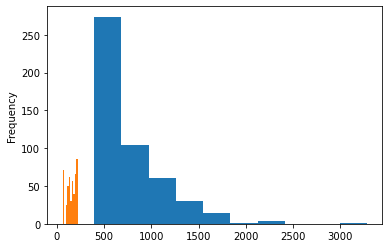

In [744]:
df_mod['N100'][df_mod['N100_high']].plot.hist()
df_mod['N100'][df_mod['N100_low']].plot.hist()

In [745]:
df_mod['OA_low'] = df_mod['OA']<df_mod['OA'].quantile(.34)
df_mod['OA_high']= df_mod['OA']>df_mod['OA'].quantile(.66)

In [746]:
#df_mod['OA_low'].loc[:,:] = df_mod['OA']<df_mod['OA'].quantile(.34)
mid_range = ( df_mod['OA'].quantile(.34)<df_mod['OA']) & (df_mod['OA']<df_mod['OA'].quantile(.66))
df_mod['OA_mid_range'] = mid_range

In [747]:

df_mod=df_mod.assign(OA_category= pd.NA)
df_mod.loc[df_mod['OA_high'], 'OA_category'] = 'OA high'
df_mod.loc[df_mod['OA_low'], 'OA_category'] = 'OA low'



## Distribution plots:

In [748]:
palette = 'Set2'

In [749]:
import numpy as np

In [750]:
import matplotlib.cm as cm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [751]:
#cmap = cm.get_cmap(name=palette, )
cmap_list = ['#441FE0','#BBE01F'][::-1]#cmap(a) for a in np.linspace(0,1,8)]

In [752]:
palette_OA = cmap_list[0:2]

3673
975


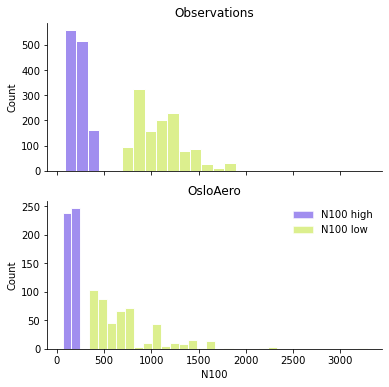

In [753]:
fig, axs = plt.subplots(2,1, sharex=True, figsize =[6,6])
v_x = 'N100'
x_cut = 10000
v_hue = 'N100_category'
category = 'N100_category'
hue_order=['N100 low', 'N100 high'][::-1]

_palette = palette_OA#cmap_list[0:2]


_df = df_hyy_1
_df = _df[_df[v_x]<x_cut]

ax = axs[0]
sns.histplot(#x='TGCLDLWP',
            x=v_x,
            data=_df,
            hue=v_hue,
    hue_order=hue_order,
    palette=_palette,
    legend=False,
    edgecolor='w',

    ax = ax
           )
#plt.ylim([0,250])
print(len(_df))
ax.set_title('Observations')


ax = axs[1]

_df = (df_mod[(df_mod[category].notna())])
_df = _df[_df[v_x]<x_cut]
sns.histplot(#x='TGCLDLWP',
            x=v_x,
            data=_df,
            hue=v_hue,
    hue_order=hue_order,
    ax = ax,
    legend=False,

    palette = _palette,
    edgecolor='w',

           #kind='swarm'
           )
ax.set_title('OsloAero')

custom_lines = [Line2D([0], [0], color=cmap_list[0], lw=4),
                Line2D([0], [0], color=cmap_list[1], lw=4),
               # Line2D([0], [0], color=cmap(1.), lw=4)

               ]

leg_els = [

    Patch(edgecolor='w',alpha = .5, facecolor=_palette[1], label=hue_order[0]),
    Patch(edgecolor='w', alpha = .5,facecolor=_palette[0], label=hue_order[1]),

]

ax.legend(handles = leg_els, frameon=False)
ax.set_xlabel('N100')
#plt.ylim([0,250])
print(len(_df))
sns.despine(fig)

fn = make_fn(case_name, v_x,'obs',comment='distribution')

fig.savefig(fn, dpi=150)



3673


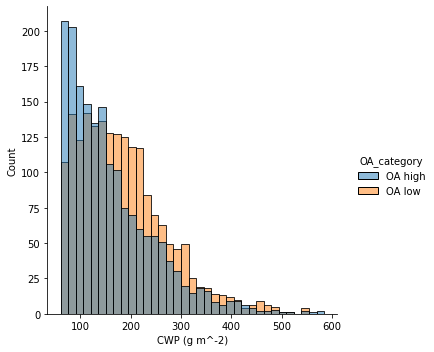

In [754]:
_df = df_hyy_1
_df = _df[_df['CWP (g m^-2)']<600]
sns.displot(#x='TGCLDLWP',
            x='CWP (g m^-2)',
            data=_df,
            hue='OA_category',
           #kind='swarm'

           )
#plt.ylim([0,250])
print(len(df_hyy_1[df_hyy_1['OA_category'].notna()]))

963


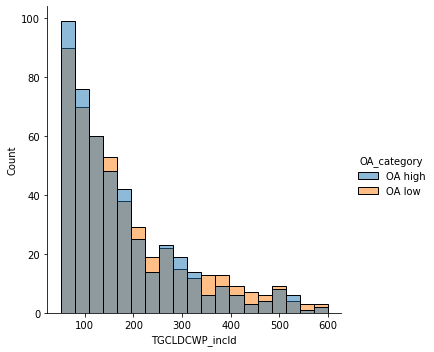

In [755]:
_df = (df_mod[(df_mod['OA_category'].notna()) & (df_mod['TOT_ICLD_VISTAU_s']>1)])
_df = _df[_df['TGCLDCWP_incld']<600]
sns.displot(#x='TGCLDLWP',
            x='TGCLDCWP_incld',
            data=_df,
            hue='OA_category',
           #kind='swarm'
           )
#plt.ylim([0,250])
print(len(df_mod[df_mod['OA_category'].notna()]))

963


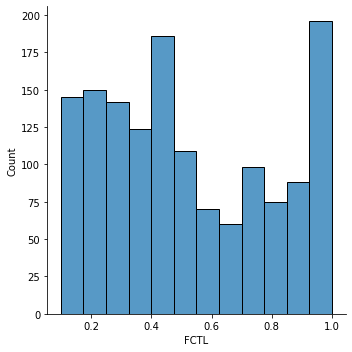

In [756]:
_df = df_mod#[(df_mod['OA_category'].notna()) & (df_mod['TOT_ICLD_VISTAU_s']>1)])
_df = _df#[_df['TGCLDCWP']<700]
sns.displot(#x='TGCLDLWP',
            x='FCTL',
            data=_df,
            #hue='OA_category',
    palette=palette_OA,
           #kind='swarm'
           )
#plt.ylim([0,250])
print(len(df_mod[df_mod['OA_category'].notna()]))

### Take only points where 30% of cloud top is liquid

963


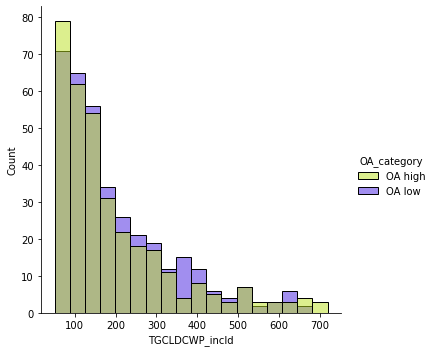

In [757]:
_df = df_mod
_df = _df[_df['FCTL']>.3]
sns.displot(
    x='TGCLDCWP_incld',
    data=_df,
    hue='OA_category',
    palette=palette_OA,
)
print(len(df_mod[df_mod['OA_category'].notna()]))

992


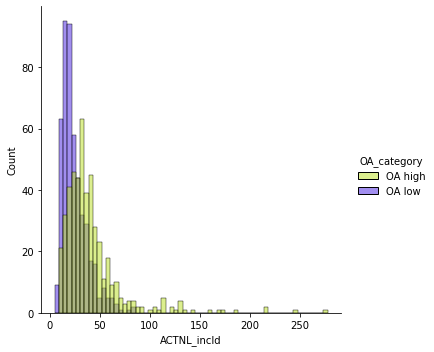

In [758]:
sns.displot(
    x='ACTNL_incld',
    data=df_mod[~df_mod['OA_mid_range']].reset_index(),
    hue='OA_category',
    palette=palette_OA,
)
print(len(df_mod[~df_mod['OA_mid_range']]))

992
992


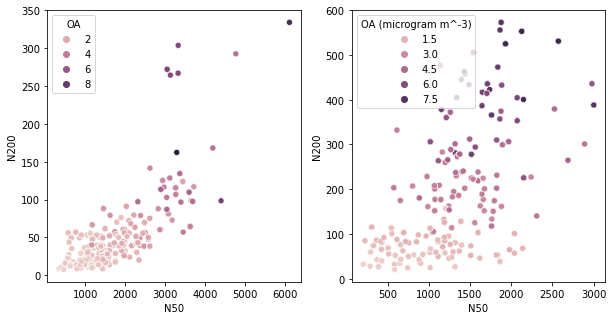

In [759]:
f, axs = plt.subplots(1,2, figsize=[10,5])
sns.scatterplot(
    x='N50',
    y='N200',
    data=df_mod,#~df_mod['OA_mid_range']].reset_index(),
    hue='OA',
    ax = axs[0]
    #palette=palette_OA,
)
print(len(df_mod[~df_mod['OA_mid_range']]))

sns.scatterplot(
    x='N50',
    y='N200',
    data=df_hyy_1,
    hue='OA (microgram m^-3)',
    ax = axs[1],
    #palette=palette_OA,
)
print(len(df_mod[~df_mod['OA_mid_range']]))

992
992


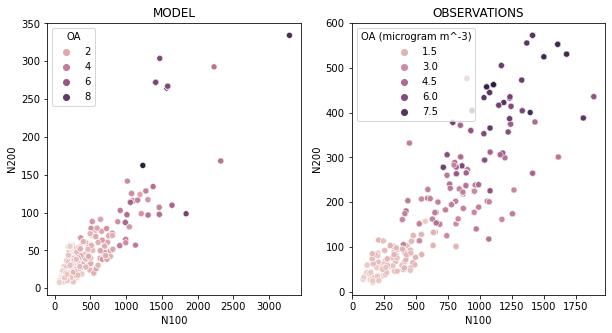

In [760]:
f, axs = plt.subplots(1,2, figsize=[10,5])
sns.scatterplot(
    x='N100',
    y='N200',
    data=df_mod,#~df_mod['OA_mid_range']].reset_index(),
    hue='OA',
    ax = axs[0]
    #palette=palette_OA,
)
axs[0].set_title('MODEL')
print(len(df_mod[~df_mod['OA_mid_range']]))

sns.scatterplot(
    x='N100',
    y='N200',
    data=df_hyy_1,
    hue='OA (microgram m^-3)',
    ax = axs[1],
    #palette=palette_OA,
)
axs[1].set_title('OBSERVATIONS')
print(len(df_mod[~df_mod['OA_mid_range']]))

992
992


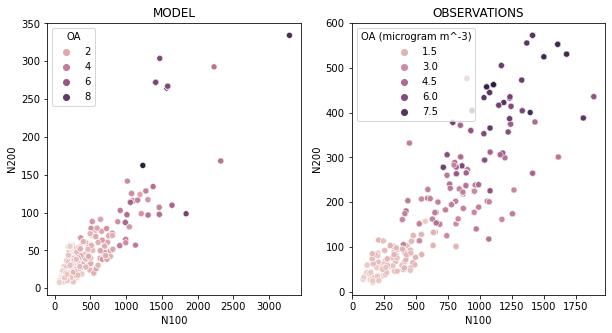

In [761]:
f, axs = plt.subplots(1,2, figsize=[10,5])
sns.scatterplot(
    x='N100',
    y='N200',
    data=df_mod,#~df_mod['OA_mid_range']].reset_index(),
    hue='OA',
    ax = axs[0]
    #palette=palette_OA,
)
axs[0].set_title('MODEL')
print(len(df_mod[~df_mod['OA_mid_range']]))

sns.scatterplot(
    x='N100',
    y='N200',
    data=df_hyy_1,
    hue='OA (microgram m^-3)',
    ax = axs[1],
    #palette=palette_OA,
)
axs[1].set_title('OBSERVATIONS')
print(len(df_mod[~df_mod['OA_mid_range']]))

## Cloud optical thickness

### Incloud

In [762]:
hue_order = ['OA low','OA high']
palette_OA_2 = palette_OA[::-1]

# N100

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 53.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 38.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 24.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


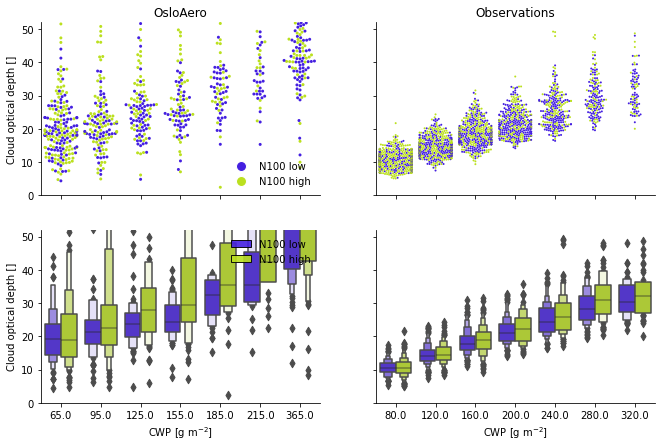

In [788]:
x_mod = 'CWP_cutl'
x_obs = 'CWP_cutl'
y_mod = 'TOT_ICLD_VISTAU_s'

y_obs = 'COT'
v_hue = 'N100_category'
category = 'N100_category'
hue_order=['N100 low', 'N100 high']#[::-1]

ylim = [0,52]
figsize = [12,10]
figsize = [11,7]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex='col')

markersize= 2

_df_obs = df_hyy_1[df_hyy_1[category].notna()]#df_mod[df_mod['OA_category'].notna()].reset_index()
_df_obs_lim =_df_obs[(_df_obs[y_obs]<=ylim[1])& (_df_obs[y_obs]>=ylim[0])]


ax = axs[0,1]
sns.swarmplot(
    x=x_obs,
    y=y_obs,
    data=_df_obs_lim,
    hue_order=hue_order,
    hue=category,
    palette=_palette,
    size = markersize,
    ax = ax,
)


ax = axs[1,1]
sns.boxenplot(
    x=x_obs,
    y=y_obs,
    data= _df_obs,
    hue_order=hue_order,#['OA low','OA high'],
    hue=category,

    #kind='boxen',
    ax = ax,
    palette=_palette,
           )


## PLOT MODEL



_df_mod = df_mod[df_mod[category].notna()].reset_index()
_df_mod_lim =_df_mod[(_df_mod[y_mod]<=ylim[1])& (_df_mod[y_mod]>=ylim[0])]

markersize=3
ax = axs[0,0]
sns.swarmplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod_lim,
    hue_order=hue_order,

    hue=category,

    palette=_palette,
    ax = ax,
    size = markersize,
)


ax = axs[1,0]
sns.boxenplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod,
    hue_order=hue_order,

    ax = ax,
    hue=category,

    palette=_palette,
)


## ADJUSTMENTS

leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_order[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_order[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_order[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_order[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)


for ax in axs[:,1]:
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)
for ax in axs[:,0]:
    ax.set_ylabel('Cloud optical depth []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)


axs[0,0].set_title('OsloAero')
axs[0,1].set_title('Observations')

sns.despine(fig)

fn = make_fn(case_name+f'_{category}_', x_mod,y_mod, comment='binned_by_x')

fig.savefig(fn, dpi=150)
plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 53.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 38.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 24.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


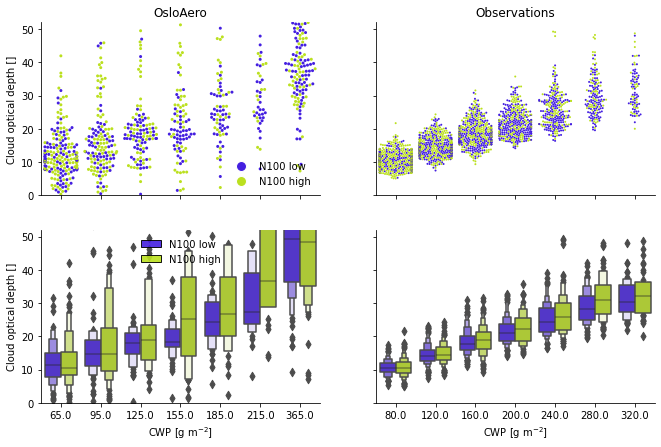

In [789]:
x_mod = 'CWP_cutl'
x_obs = 'CWP_cutl'
y_mod = 'TOT_CLD_VISTAU_s'
y_obs = 'COT'
v_hue = 'N100_category'
category = 'N100_category'
hue_order=['N100 low', 'N100 high']#[::-1]

ylim = [0,52]
figsize = [12,10]
figsize = [11,7]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex='col')

markersize= 2

_df_obs = df_hyy_1[df_hyy_1[category].notna()]#df_mod[df_mod['OA_category'].notna()].reset_index()
_df_obs_lim =_df_obs[(_df_obs[y_obs]<=ylim[1])& (_df_obs[y_obs]>=ylim[0])]


ax = axs[0,1]
sns.swarmplot(
    x=x_obs,
    y=y_obs,
    data=_df_obs_lim,
    hue_order=hue_order,
    hue=category,
    palette=_palette,
    size = markersize,
    ax = ax,
)


ax = axs[1,1]
sns.boxenplot(
    x=x_obs,
    y=y_obs,
    data= _df_obs,
    hue_order=hue_order,#['OA low','OA high'],
    hue=category,

    #kind='boxen',
    ax = ax,
    palette=_palette,
           )


## PLOT MODEL



_df_mod = df_mod[df_mod[category].notna()].reset_index()
_df_mod_lim =_df_mod[(_df_mod[y_mod]<=ylim[1])& (_df_mod[y_mod]>=ylim[0])]

markersize=3
ax = axs[0,0]
sns.swarmplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod_lim,
    hue_order=hue_order,

    hue=category,

    palette=_palette,
    ax = ax,
    size = markersize,
)


ax = axs[1,0]
sns.boxenplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod,
    hue_order=hue_order,

    ax = ax,
    hue=category,

    palette=_palette,
)


## ADJUSTMENTS

leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_order[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_order[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_order[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_order[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)


for ax in axs[:,1]:
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)
for ax in axs[:,0]:
    ax.set_ylabel('Cloud optical depth []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)


axs[0,0].set_title('OsloAero')
axs[0,1].set_title('Observations')

sns.despine(fig)
fn = make_fn(case_name+f'_{category}_', x_mod,y_mod, comment='binned_by_x')
fig.savefig(fn, dpi=150)
plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg

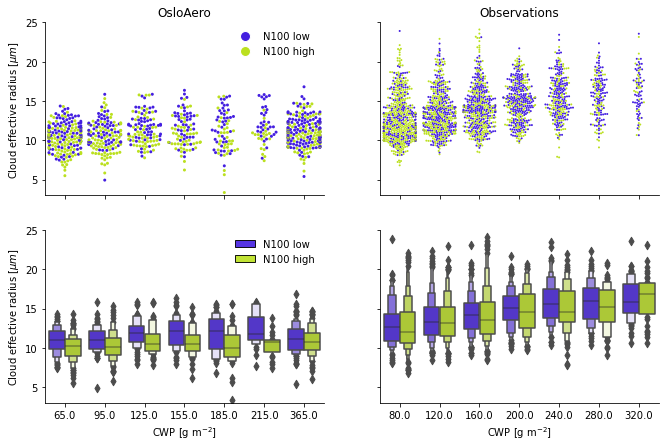

In [790]:
x_mod = 'CWP_cutl'
x_obs = 'CWP_cutl'
y_mod = 'ACTREL_incld'
y_obs = 'CER (micrometer)'

ylabel = 'Cloud effective radius [$\mu m$]'
ylim = [3,25]
figsize = [11,7]

v_hue = 'N100_category'





category = 'N100_category'
hue_order=['N100 low', 'N100 high']#[::-1]

_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex='col')

markersize= 2

_df_obs = df_hyy_1[df_hyy_1[category].notna()]#df_mod[df_mod['OA_category'].notna()].reset_index()
_df_obs_lim =_df_obs[(_df_obs[y_obs]<=ylim[1])& (_df_obs[y_obs]>=ylim[0])]


ax = axs[0,1]
sns.swarmplot(
    x=x_obs,
    y=y_obs,
    data=_df_obs_lim,
    hue_order=hue_order,
    hue=category,
    palette=_palette,
    size = markersize,
    ax = ax,
)


ax = axs[1,1]
sns.boxenplot(
    x=x_obs,
    y=y_obs,
    data= _df_obs,
    hue_order=hue_order,#['OA low','OA high'],
    hue=category,

    #kind='boxen',
    ax = ax,
    palette=_palette,
           )


## PLOT MODEL



_df_mod = df_mod[df_mod[category].notna()].reset_index()
_df_mod_lim =_df_mod[(_df_mod[y_mod]<=ylim[1])& (_df_mod[y_mod]>=ylim[0])]

markersize=3
ax = axs[0,0]
sns.swarmplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod_lim,
    hue_order=hue_order,

    hue=category,

    palette=_palette,
    ax = ax,
    size = markersize,
)


ax = axs[1,0]
sns.boxenplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod,
    hue_order=hue_order,

    ax = ax,
    hue=category,

    palette=_palette,
)


## ADJUSTMENTS

leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_order[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_order[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_order[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_order[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)


for ax in axs[:,1]:
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)
for ax in axs[:,0]:
    ax.set_ylabel(ylabel)
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)


axs[0,0].set_title('OsloAero')
axs[0,1].set_title('Observations')

sns.despine(fig)
fn = make_fn(case_name+f'_{category}_', x_mod,y_mod, comment='binned_by_x')
fig.savefig(fn, dpi=150)
plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


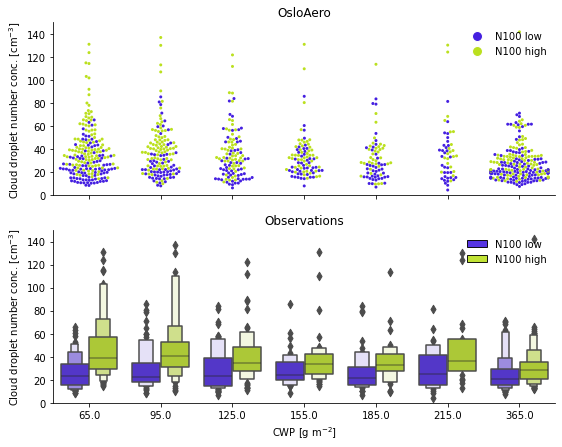

In [792]:
x_mod = 'CWP_cutl'
y_mod = 'ACTNL_incld'
ylim = [0,150]
figsize = [9,7]
_palette = palette_OA_2


v_hue = 'N100_category'





category = 'N100_category'
hue_order=['N100 low', 'N100 high']#[::-1]

_palette = palette_OA_2



fig, axs = plt.subplots(2,1,figsize=figsize, sharey=True, sharex='col')

markersize= 2

_df_obs = df_hyy_1
_df_obs_lim =_df_obs[(_df_obs[y_obs]<=ylim[1])& (_df_obs[y_obs]>=ylim[0])]

_df_mod = df_mod[df_mod[category].notna()].reset_index()
_df_mod_lim =_df_mod[(_df_mod[y_mod]<=ylim[1])& (_df_mod[y_mod]>=ylim[0])]



## PLOT MODEL

markersize=3
ax = axs[0]
sns.swarmplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod_lim,
    hue_order=hue_order,
    hue=category,
    palette=_palette,
    ax = ax,
    size = markersize,
)


ax = axs[1]
sns.boxenplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod,
    hue_order=hue_order,
    hue=category,
    ax = ax,
    palette=_palette,
)


## ADJUSTMENTS

leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_order[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_order[1]),
          ]
axs[1].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_order[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_order[1]
           ),
          ]
axs[0].legend(handles = leg_els, frameon=False)


#for ax in axs[:,1]:
#    ax.legend([],[], frameon=False)
#    ax.set_ylabel(None)
for ax in axs:
    ax.set_ylabel(r'Cloud droplet number conc. [cm$^{-3}$]')
for ax in axs:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[:-1]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)

axs[0].set_title('OsloAero')
axs[1].set_title('Observations')


sns.despine(fig)

fn = make_fn(case_name+f'_{category}_', x_mod,y_mod, comment='binned_by_x')

fig.savefig(fn, dpi=150)
plt.show()

### Grid box avg

# N50

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


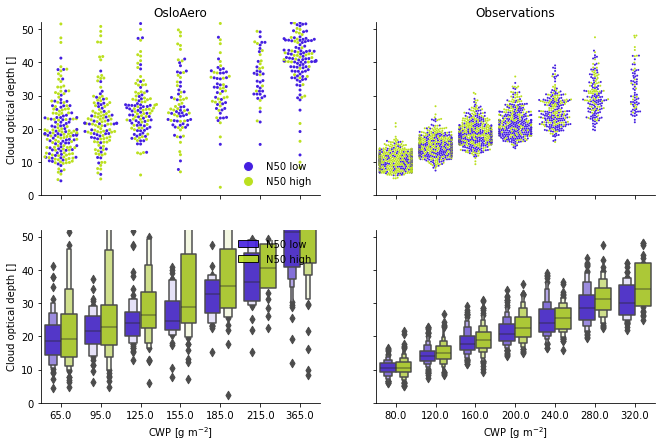

In [793]:
x_mod = 'CWP_cutl'
x_obs = 'CWP_cutl'
y_mod = 'TOT_ICLD_VISTAU_s'

y_obs = 'COT'
v_hue = 'N50_category'
category = 'N50_category'
hue_order=['N50 low', 'N50 high']#[::-1]

ylim = [0,52]
figsize = [12,10]
figsize = [11,7]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex='col')

markersize= 2

_df_obs = df_hyy_1[df_hyy_1[category].notna()]#df_mod[df_mod['OA_category'].notna()].reset_index()
_df_obs_lim =_df_obs[(_df_obs[y_obs]<=ylim[1])& (_df_obs[y_obs]>=ylim[0])]


ax = axs[0,1]
sns.swarmplot(
    x=x_obs,
    y=y_obs,
    data=_df_obs_lim,
    hue_order=hue_order,
    hue=category,
    palette=_palette,
    size = markersize,
    ax = ax,
)


ax = axs[1,1]
sns.boxenplot(
    x=x_obs,
    y=y_obs,
    data= _df_obs,
    hue_order=hue_order,#['OA low','OA high'],
    hue=category,

    #kind='boxen',
    ax = ax,
    palette=_palette,
           )


## PLOT MODEL



_df_mod = df_mod[df_mod[category].notna()].reset_index()
_df_mod_lim =_df_mod[(_df_mod[y_mod]<=ylim[1])& (_df_mod[y_mod]>=ylim[0])]

markersize=3
ax = axs[0,0]
sns.swarmplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod_lim,
    hue_order=hue_order,

    hue=category,

    palette=_palette,
    ax = ax,
    size = markersize,
)


ax = axs[1,0]
sns.boxenplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod,
    hue_order=hue_order,

    ax = ax,
    hue=category,

    palette=_palette,
)


## ADJUSTMENTS

leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_order[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_order[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_order[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_order[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)


for ax in axs[:,1]:
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)
for ax in axs[:,0]:
    ax.set_ylabel('Cloud optical depth []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)


axs[0,0].set_title('OsloAero')
axs[0,1].set_title('Observations')

sns.despine(fig)

fn = make_fn(case_name+f'_{category}_', x_mod,y_mod, comment='binned_by_x')

fig.savefig(fn, dpi=150)
plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


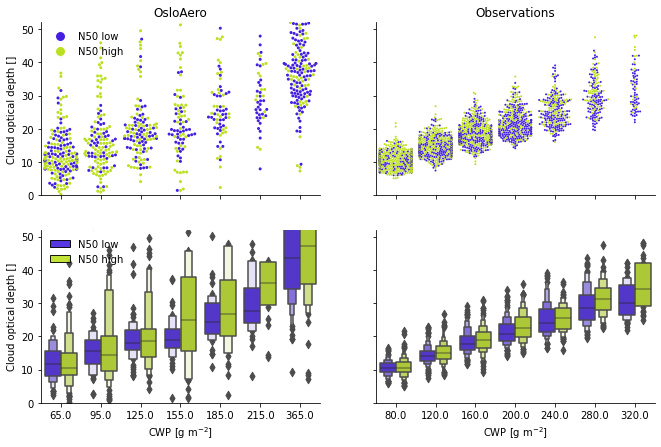

In [794]:
x_mod = 'CWP_cutl'
x_obs = 'CWP_cutl'
y_mod = 'TOT_CLD_VISTAU_s'
y_obs = 'COT'
v_hue = 'N50_category'
category = 'N50_category'
hue_order=['N50 low', 'N50 high']#[::-1]

ylim = [0,52]
figsize = [12,10]
figsize = [11,7]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex='col')

markersize= 2

_df_obs = df_hyy_1[df_hyy_1[category].notna()]#df_mod[df_mod['OA_category'].notna()].reset_index()
_df_obs_lim =_df_obs[(_df_obs[y_obs]<=ylim[1])& (_df_obs[y_obs]>=ylim[0])]


ax = axs[0,1]
sns.swarmplot(
    x=x_obs,
    y=y_obs,
    data=_df_obs_lim,
    hue_order=hue_order,
    hue=category,
    palette=_palette,
    size = markersize,
    ax = ax,
)


ax = axs[1,1]
sns.boxenplot(
    x=x_obs,
    y=y_obs,
    data= _df_obs,
    hue_order=hue_order,#['OA low','OA high'],
    hue=category,

    #kind='boxen',
    ax = ax,
    palette=_palette,
           )


## PLOT MODEL



_df_mod = df_mod[df_mod[category].notna()].reset_index()
_df_mod_lim =_df_mod[(_df_mod[y_mod]<=ylim[1])& (_df_mod[y_mod]>=ylim[0])]

markersize=3
ax = axs[0,0]
sns.swarmplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod_lim,
    hue_order=hue_order,

    hue=category,

    palette=_palette,
    ax = ax,
    size = markersize,
)


ax = axs[1,0]
sns.boxenplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod,
    hue_order=hue_order,

    ax = ax,
    hue=category,

    palette=_palette,
)


## ADJUSTMENTS

leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_order[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_order[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_order[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_order[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)


for ax in axs[:,1]:
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)
for ax in axs[:,0]:
    ax.set_ylabel('Cloud optical depth []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)


axs[0,0].set_title('OsloAero')
axs[0,1].set_title('Observations')

sns.despine(fig)

fn = make_fn(case_name+f'_{category}_', x_mod,y_mod, comment='binned_by_x')

fig.savefig(fn, dpi=150)
plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(),

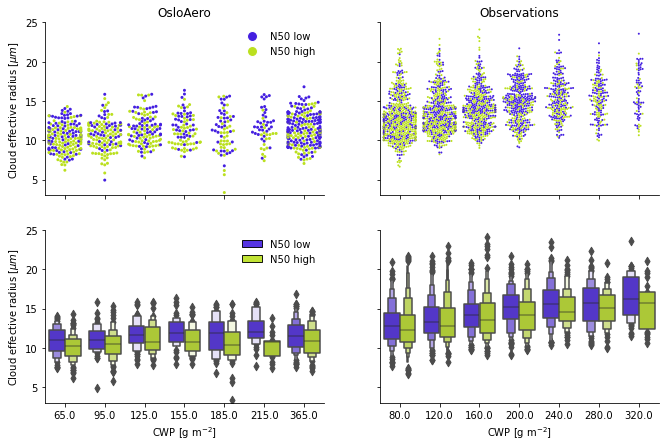

In [795]:
x_mod = 'CWP_cutl'
x_obs = 'CWP_cutl'
y_mod = 'ACTREL_incld'
y_obs = 'CER (micrometer)'

ylabel = 'Cloud effective radius [$\mu m$]'
ylim = [3,25]
figsize = [11,7]

v_hue = 'N50_category'





category = 'N50_category'
hue_order=['N50 low', 'N50 high']#[::-1]

_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex='col')

markersize= 2

_df_obs = df_hyy_1[df_hyy_1[category].notna()]#df_mod[df_mod['OA_category'].notna()].reset_index()
_df_obs_lim =_df_obs[(_df_obs[y_obs]<=ylim[1])& (_df_obs[y_obs]>=ylim[0])]


ax = axs[0,1]
sns.swarmplot(
    x=x_obs,
    y=y_obs,
    data=_df_obs_lim,
    hue_order=hue_order,
    hue=category,
    palette=_palette,
    size = markersize,
    ax = ax,
)


ax = axs[1,1]
sns.boxenplot(
    x=x_obs,
    y=y_obs,
    data= _df_obs,
    hue_order=hue_order,#['OA low','OA high'],
    hue=category,

    #kind='boxen',
    ax = ax,
    palette=_palette,
           )


## PLOT MODEL



_df_mod = df_mod[df_mod[category].notna()].reset_index()
_df_mod_lim =_df_mod[(_df_mod[y_mod]<=ylim[1])& (_df_mod[y_mod]>=ylim[0])]

markersize=3
ax = axs[0,0]
sns.swarmplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod_lim,
    hue_order=hue_order,

    hue=category,

    palette=_palette,
    ax = ax,
    size = markersize,
)


ax = axs[1,0]
sns.boxenplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod,
    hue_order=hue_order,

    ax = ax,
    hue=category,

    palette=_palette,
)


## ADJUSTMENTS

leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_order[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_order[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_order[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_order[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)


for ax in axs[:,1]:
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)
for ax in axs[:,0]:
    ax.set_ylabel(ylabel)
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)


axs[0,0].set_title('OsloAero')
axs[0,1].set_title('Observations')

sns.despine(fig)

fn = make_fn(case_name+f'_{category}_', x_mod,y_mod, comment='binned_by_x')

fig.savefig(fn, dpi=150)
plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


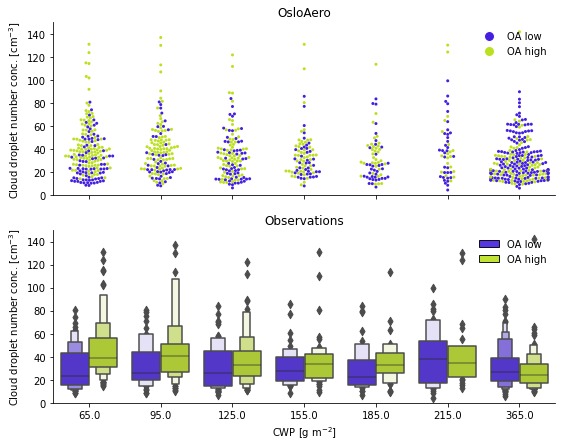

In [796]:
x_mod = 'CWP_cutl'
y_mod = 'ACTNL_incld'
ylim = [0,150]
figsize = [9,7]
_palette = palette_OA_2


v_hue = 'N50_category'





category = 'N50_category'
hue_order=['N50 low', 'N50 high']#[::-1]

_palette = palette_OA_2



fig, axs = plt.subplots(2,1,figsize=figsize, sharey=True, sharex='col')

markersize= 2

_df_obs = df_hyy_1
_df_obs_lim =_df_obs[(_df_obs[y_obs]<=ylim[1])& (_df_obs[y_obs]>=ylim[0])]

_df_mod = df_mod[df_mod[category].notna()].reset_index()
_df_mod_lim =_df_mod[(_df_mod[y_mod]<=ylim[1])& (_df_mod[y_mod]>=ylim[0])]



## PLOT MODEL

markersize=3
ax = axs[0]
sns.swarmplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod_lim,
    hue_order=hue_order,
    hue=category,
    palette=_palette,
    ax = ax,
    size = markersize,
)


ax = axs[1]
sns.boxenplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod,
    hue_order=hue_order,
    hue=category,
    ax = ax,
    palette=_palette,
)


## ADJUSTMENTS

leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label='OA low'),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label='OA high'),
          ]
axs[1].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label='OA low'
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label='OA high'
           ),
          ]
axs[0].legend(handles = leg_els, frameon=False)


#for ax in axs[:,1]:
#    ax.legend([],[], frameon=False)
#    ax.set_ylabel(None)
for ax in axs:
    ax.set_ylabel(r'Cloud droplet number conc. [cm$^{-3}$]')
for ax in axs:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[:-1]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)

axs[0].set_title('OsloAero')
axs[1].set_title('Observations')


sns.despine(fig)

fn = make_fn(case_name+f'_{category}_', x_mod,y_mod, comment='binned_by_x')

fig.savefig(fn, dpi=150)
plt.show()

### Grid box avg

## N150

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 53.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


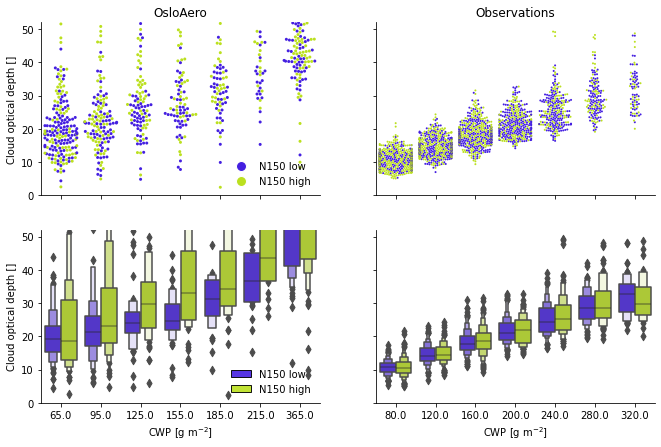

In [771]:
x_mod = 'CWP_cutl'
x_obs = 'CWP_cutl'
y_mod = 'TOT_ICLD_VISTAU_s'

y_obs = 'COT'
v_hue = 'N150_category'
category = 'N150_category'
hue_order=['N150 low', 'N150 high']#[::-1]

ylim = [0,52]
figsize = [12,10]
figsize = [11,7]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex='col')

markersize= 2

_df_obs = df_hyy_1[df_hyy_1[category].notna()]#df_mod[df_mod['OA_category'].notna()].reset_index()
_df_obs_lim =_df_obs[(_df_obs[y_obs]<=ylim[1])& (_df_obs[y_obs]>=ylim[0])]


ax = axs[0,1]
sns.swarmplot(
    x=x_obs,
    y=y_obs,
    data=_df_obs_lim,
    hue_order=hue_order,
    hue=category,
    palette=_palette,
    size = markersize,
    ax = ax,
)


ax = axs[1,1]
sns.boxenplot(
    x=x_obs,
    y=y_obs,
    data= _df_obs,
    hue_order=hue_order,#['OA low','OA high'],
    hue=category,

    #kind='boxen',
    ax = ax,
    palette=_palette,
           )


## PLOT MODEL



_df_mod = df_mod[df_mod[category].notna()].reset_index()
_df_mod_lim =_df_mod[(_df_mod[y_mod]<=ylim[1])& (_df_mod[y_mod]>=ylim[0])]

markersize=3
ax = axs[0,0]
sns.swarmplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod_lim,
    hue_order=hue_order,

    hue=category,

    palette=_palette,
    ax = ax,
    size = markersize,
)


ax = axs[1,0]
sns.boxenplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod,
    hue_order=hue_order,

    ax = ax,
    hue=category,

    palette=_palette,
)


## ADJUSTMENTS

leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_order[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_order[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_order[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_order[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)


for ax in axs[:,1]:
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)
for ax in axs[:,0]:
    ax.set_ylabel('Cloud optical depth []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)


axs[0,0].set_title('OsloAero')
axs[0,1].set_title('Observations')

sns.despine(fig)

fn = make_fn(case_name, x_mod,y_mod, comment='binned_by_x')
fig.savefig(fn, dpi=150)
plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 53.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


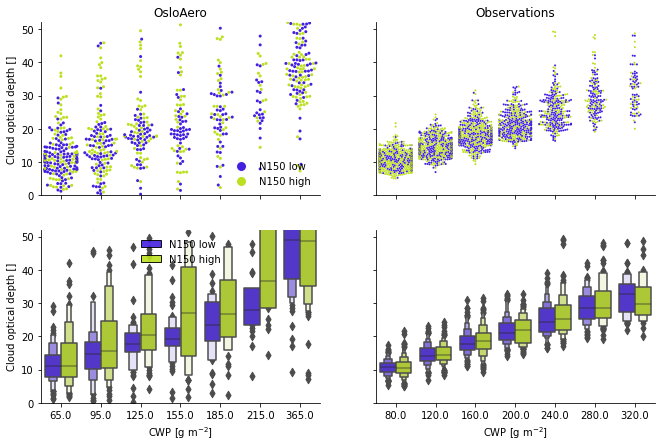

In [772]:
x_mod = 'CWP_cutl'
x_obs = 'CWP_cutl'
y_mod = 'TOT_CLD_VISTAU_s'
y_obs = 'COT'
v_hue = 'N150_category'
category = 'N150_category'
hue_order=['N150 low', 'N150 high']#[::-1]

ylim = [0,52]
figsize = [12,10]
figsize = [11,7]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex='col')

markersize= 2

_df_obs = df_hyy_1[df_hyy_1[category].notna()]#df_mod[df_mod['OA_category'].notna()].reset_index()
_df_obs_lim =_df_obs[(_df_obs[y_obs]<=ylim[1])& (_df_obs[y_obs]>=ylim[0])]


ax = axs[0,1]
sns.swarmplot(
    x=x_obs,
    y=y_obs,
    data=_df_obs_lim,
    hue_order=hue_order,
    hue=category,
    palette=_palette,
    size = markersize,
    ax = ax,
)


ax = axs[1,1]
sns.boxenplot(
    x=x_obs,
    y=y_obs,
    data= _df_obs,
    hue_order=hue_order,#['OA low','OA high'],
    hue=category,

    #kind='boxen',
    ax = ax,
    palette=_palette,
           )


## PLOT MODEL



_df_mod = df_mod[df_mod[category].notna()].reset_index()
_df_mod_lim =_df_mod[(_df_mod[y_mod]<=ylim[1])& (_df_mod[y_mod]>=ylim[0])]

markersize=3
ax = axs[0,0]
sns.swarmplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod_lim,
    hue_order=hue_order,

    hue=category,

    palette=_palette,
    ax = ax,
    size = markersize,
)


ax = axs[1,0]
sns.boxenplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod,
    hue_order=hue_order,

    ax = ax,
    hue=category,

    palette=_palette,
)


## ADJUSTMENTS

leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_order[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_order[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_order[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_order[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)


for ax in axs[:,1]:
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)
for ax in axs[:,0]:
    ax.set_ylabel('Cloud optical depth []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)


axs[0,0].set_title('OsloAero')
axs[0,1].set_title('Observations')

sns.despine(fig)

fn = make_fn(case_name, x_mod,y_mod, comment='binned_by_x')
fig.savefig(fn, dpi=150)
plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), 

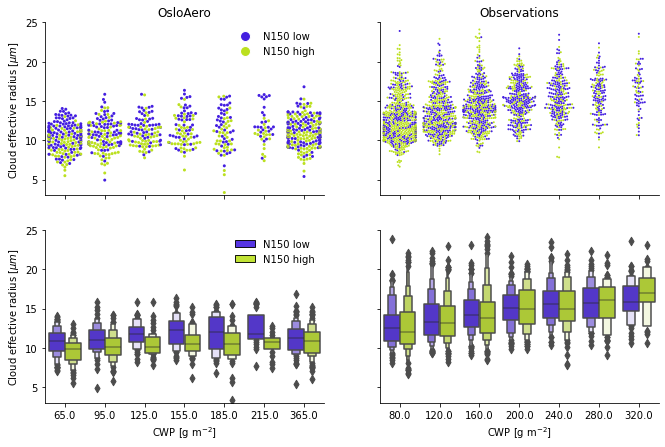

In [782]:
x_mod = 'CWP_cutl'
x_obs = 'CWP_cutl'
y_mod = 'ACTREL_incld'
y_obs = 'CER (micrometer)'

ylabel = 'Cloud effective radius [$\mu m$]'
ylim = [3,25]
figsize = [11,7]

v_hue = 'N150_category'





category = 'N150_category'
hue_order=['N150 low', 'N150 high']#[::-1]

_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex='col')

markersize= 2

_df_obs = df_hyy_1[df_hyy_1[category].notna()]#df_mod[df_mod['OA_category'].notna()].reset_index()
_df_obs_lim =_df_obs[(_df_obs[y_obs]<=ylim[1])& (_df_obs[y_obs]>=ylim[0])]


ax = axs[0,1]
sns.swarmplot(
    x=x_obs,
    y=y_obs,
    data=_df_obs_lim,
    hue_order=hue_order,
    hue=category,
    palette=_palette,
    size = markersize,
    ax = ax,
)


ax = axs[1,1]
sns.boxenplot(
    x=x_obs,
    y=y_obs,
    data= _df_obs,
    hue_order=hue_order,#['OA low','OA high'],
    hue=category,

    #kind='boxen',
    ax = ax,
    palette=_palette,
           )


## PLOT MODEL



_df_mod = df_mod[df_mod[category].notna()].reset_index()
_df_mod_lim =_df_mod[(_df_mod[y_mod]<=ylim[1])& (_df_mod[y_mod]>=ylim[0])]

markersize=3
ax = axs[0,0]
sns.swarmplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod_lim,
    hue_order=hue_order,

    hue=category,

    palette=_palette,
    ax = ax,
    size = markersize,
)


ax = axs[1,0]
sns.boxenplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod,
    hue_order=hue_order,

    ax = ax,
    hue=category,

    palette=_palette,
)


## ADJUSTMENTS

leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_order[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_order[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_order[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_order[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)


for ax in axs[:,1]:
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)
for ax in axs[:,0]:
    ax.set_ylabel(ylabel)
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)


axs[0,0].set_title('OsloAero')
axs[0,1].set_title('Observations')

sns.despine(fig)

fn = make_fn(case_name+f'_{category}_', x_mod,y_mod, comment='binned_by_x')
fig.savefig(fn, dpi=150)
plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


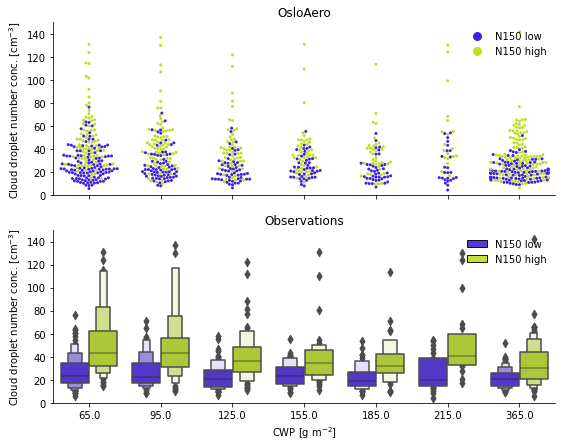

In [783]:
x_mod = 'CWP_cutl'
y_mod = 'ACTNL_incld'
ylim = [0,150]
figsize = [9,7]
_palette = palette_OA_2


v_hue = 'N150_category'





category = 'N150_category'
hue_order=['N150 low', 'N150 high']#[::-1]

_palette = palette_OA_2



fig, axs = plt.subplots(2,1,figsize=figsize, sharey=True, sharex='col')

markersize= 2

_df_obs = df_hyy_1
_df_obs_lim =_df_obs[(_df_obs[y_obs]<=ylim[1])& (_df_obs[y_obs]>=ylim[0])]

_df_mod = df_mod[df_mod[category].notna()].reset_index()
_df_mod_lim =_df_mod[(_df_mod[y_mod]<=ylim[1])& (_df_mod[y_mod]>=ylim[0])]



## PLOT MODEL

markersize=3
ax = axs[0]
sns.swarmplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod_lim,
    hue_order=hue_order,
    hue=category,
    palette=_palette,
    ax = ax,
    size = markersize,
)


ax = axs[1]
sns.boxenplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod,
    hue_order=hue_order,
    hue=category,
    ax = ax,
    palette=_palette,
)


## ADJUSTMENTS

leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_order[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_order[1]),
          ]
axs[1].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_order[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_order[1]
           ),
          ]
axs[0].legend(handles = leg_els, frameon=False)


#for ax in axs[:,1]:
#    ax.legend([],[], frameon=False)
#    ax.set_ylabel(None)
for ax in axs:
    ax.set_ylabel(r'Cloud droplet number conc. [cm$^{-3}$]')
for ax in axs:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[:-1]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)

axs[0].set_title('OsloAero')
axs[1].set_title('Observations')


sns.despine(fig)
fn = make_fn(case_name+f'_{category}_', x_mod,y_mod, comment='binned_by_x')

fig.savefig(fn, dpi=150)
plt.show()

### Grid box avg

## N200

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 55.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


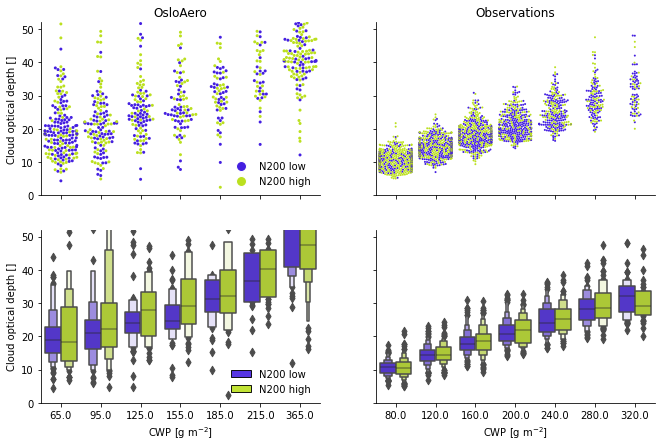

In [784]:
x_mod = 'CWP_cutl'
x_obs = 'CWP_cutl'
y_mod = 'TOT_ICLD_VISTAU_s'

y_obs = 'COT'
v_hue = 'N200_category'
category = 'N200_category'
hue_order=['N200 low', 'N200 high']#[::-1]

ylim = [0,52]
figsize = [12,10]
figsize = [11,7]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex='col')

markersize= 2

_df_obs = df_hyy_1[df_hyy_1[category].notna()]#df_mod[df_mod['OA_category'].notna()].reset_index()
_df_obs_lim =_df_obs[(_df_obs[y_obs]<=ylim[1])& (_df_obs[y_obs]>=ylim[0])]


ax = axs[0,1]
sns.swarmplot(
    x=x_obs,
    y=y_obs,
    data=_df_obs_lim,
    hue_order=hue_order,
    hue=category,
    palette=_palette,
    size = markersize,
    ax = ax,
)


ax = axs[1,1]
sns.boxenplot(
    x=x_obs,
    y=y_obs,
    data= _df_obs,
    hue_order=hue_order,#['OA low','OA high'],
    hue=category,

    #kind='boxen',
    ax = ax,
    palette=_palette,
           )


## PLOT MODEL



_df_mod = df_mod[df_mod[category].notna()].reset_index()
_df_mod_lim =_df_mod[(_df_mod[y_mod]<=ylim[1])& (_df_mod[y_mod]>=ylim[0])]

markersize=3
ax = axs[0,0]
sns.swarmplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod_lim,
    hue_order=hue_order,

    hue=category,

    palette=_palette,
    ax = ax,
    size = markersize,
)


ax = axs[1,0]
sns.boxenplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod,
    hue_order=hue_order,

    ax = ax,
    hue=category,

    palette=_palette,
)


## ADJUSTMENTS

leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_order[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_order[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_order[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_order[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)


for ax in axs[:,1]:
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)
for ax in axs[:,0]:
    ax.set_ylabel('Cloud optical depth []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)


axs[0,0].set_title('OsloAero')
axs[0,1].set_title('Observations')

sns.despine(fig)
fn = make_fn(case_name+f'_{category}_', x_mod,y_mod, comment='binned_by_x')

fig.savefig(fn, dpi=150)
plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 55.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


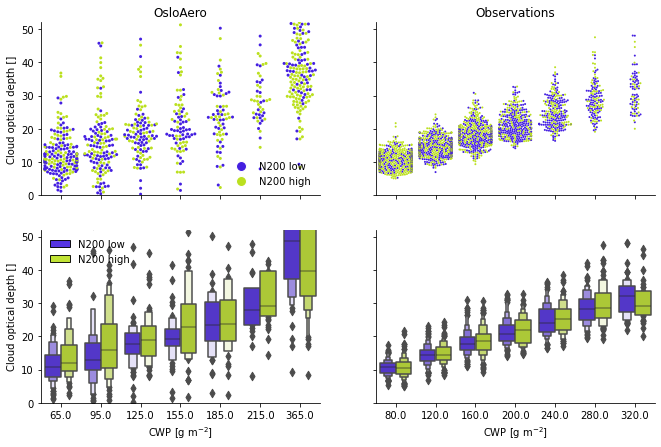

In [785]:
x_mod = 'CWP_cutl'
x_obs = 'CWP_cutl'
y_mod = 'TOT_CLD_VISTAU_s'
y_obs = 'COT'
v_hue = 'N200_category'
category = 'N200_category'
hue_order=['N200 low', 'N200 high']#[::-1]

ylim = [0,52]
figsize = [12,10]
figsize = [11,7]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex='col')

markersize= 2

_df_obs = df_hyy_1[df_hyy_1[category].notna()]#df_mod[df_mod['OA_category'].notna()].reset_index()
_df_obs_lim =_df_obs[(_df_obs[y_obs]<=ylim[1])& (_df_obs[y_obs]>=ylim[0])]


ax = axs[0,1]
sns.swarmplot(
    x=x_obs,
    y=y_obs,
    data=_df_obs_lim,
    hue_order=hue_order,
    hue=category,
    palette=_palette,
    size = markersize,
    ax = ax,
)


ax = axs[1,1]
sns.boxenplot(
    x=x_obs,
    y=y_obs,
    data= _df_obs,
    hue_order=hue_order,#['OA low','OA high'],
    hue=category,

    #kind='boxen',
    ax = ax,
    palette=_palette,
           )


## PLOT MODEL



_df_mod = df_mod[df_mod[category].notna()].reset_index()
_df_mod_lim =_df_mod[(_df_mod[y_mod]<=ylim[1])& (_df_mod[y_mod]>=ylim[0])]

markersize=3
ax = axs[0,0]
sns.swarmplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod_lim,
    hue_order=hue_order,

    hue=category,

    palette=_palette,
    ax = ax,
    size = markersize,
)


ax = axs[1,0]
sns.boxenplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod,
    hue_order=hue_order,

    ax = ax,
    hue=category,

    palette=_palette,
)


## ADJUSTMENTS

leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_order[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_order[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_order[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_order[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)


for ax in axs[:,1]:
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)
for ax in axs[:,0]:
    ax.set_ylabel('Cloud optical depth []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)


axs[0,0].set_title('OsloAero')
axs[0,1].set_title('Observations')

sns.despine(fig)
fn = make_fn(case_name+f'_{category}_', x_mod,y_mod, comment='binned_by_x')
fig.savefig(fn, dpi=150)
plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), 

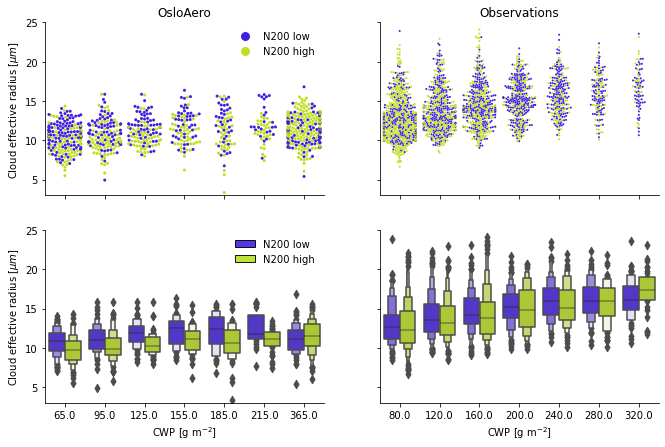

In [786]:
x_mod = 'CWP_cutl'
x_obs = 'CWP_cutl'
y_mod = 'ACTREL_incld'
y_obs = 'CER (micrometer)'

ylabel = 'Cloud effective radius [$\mu m$]'
ylim = [3,25]
figsize = [11,7]

v_hue = 'N200_category'





category = 'N200_category'
hue_order=['N200 low', 'N200 high']#[::-1]

_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex='col')

markersize= 2

_df_obs = df_hyy_1[df_hyy_1[category].notna()]#df_mod[df_mod['OA_category'].notna()].reset_index()
_df_obs_lim =_df_obs[(_df_obs[y_obs]<=ylim[1])& (_df_obs[y_obs]>=ylim[0])]


ax = axs[0,1]
sns.swarmplot(
    x=x_obs,
    y=y_obs,
    data=_df_obs_lim,
    hue_order=hue_order,
    hue=category,
    palette=_palette,
    size = markersize,
    ax = ax,
)


ax = axs[1,1]
sns.boxenplot(
    x=x_obs,
    y=y_obs,
    data= _df_obs,
    hue_order=hue_order,#['OA low','OA high'],
    hue=category,

    #kind='boxen',
    ax = ax,
    palette=_palette,
           )


## PLOT MODEL



_df_mod = df_mod[df_mod[category].notna()].reset_index()
_df_mod_lim =_df_mod[(_df_mod[y_mod]<=ylim[1])& (_df_mod[y_mod]>=ylim[0])]

markersize=3
ax = axs[0,0]
sns.swarmplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod_lim,
    hue_order=hue_order,

    hue=category,

    palette=_palette,
    ax = ax,
    size = markersize,
)


ax = axs[1,0]
sns.boxenplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod,
    hue_order=hue_order,

    ax = ax,
    hue=category,

    palette=_palette,
)


## ADJUSTMENTS

leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_order[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_order[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_order[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_order[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)


for ax in axs[:,1]:
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)
for ax in axs[:,0]:
    ax.set_ylabel(ylabel)
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)


axs[0,0].set_title('OsloAero')
axs[0,1].set_title('Observations')

sns.despine(fig)
fn = make_fn(case_name+f'_{category}_', x_mod,y_mod, comment='binned_by_x')
fig.savefig(fn, dpi=150)
plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


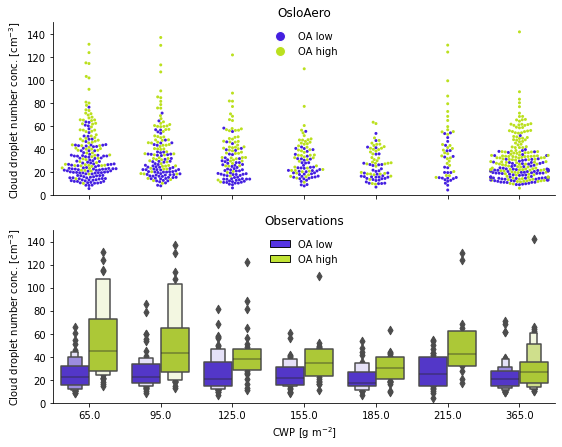

In [787]:
x_mod = 'CWP_cutl'
y_mod = 'ACTNL_incld'
ylim = [0,150]
figsize = [9,7]
_palette = palette_OA_2


v_hue = 'N200_category'
category = 'N200_category'
hue_order=['N200 low', 'N200 high']#[::-1]

_palette = palette_OA_2



fig, axs = plt.subplots(2,1,figsize=figsize, sharey=True, sharex='col')

markersize= 2

_df_obs = df_hyy_1
_df_obs_lim =_df_obs[(_df_obs[y_obs]<=ylim[1])& (_df_obs[y_obs]>=ylim[0])]

_df_mod = df_mod[df_mod[category].notna()].reset_index()
_df_mod_lim =_df_mod[(_df_mod[y_mod]<=ylim[1])& (_df_mod[y_mod]>=ylim[0])]



## PLOT MODEL

markersize=3
ax = axs[0]
sns.swarmplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod_lim,
    hue_order=hue_order,
    hue=category,
    palette=_palette,
    ax = ax,
    size = markersize,
)


ax = axs[1]
sns.boxenplot(
    x=x_mod,
    y=y_mod,
    data=_df_mod,
    hue_order=['OA low','OA high'],
    ax = ax,
    hue='OA_category',
    palette=_palette,
)


## ADJUSTMENTS

leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label='OA low'),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label='OA high'),
          ]
axs[1].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label='OA low'
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label='OA high'
           ),
          ]
axs[0].legend(handles = leg_els, frameon=False)


#for ax in axs[:,1]:
#    ax.legend([],[], frameon=False)
#    ax.set_ylabel(None)
for ax in axs:
    ax.set_ylabel(r'Cloud droplet number conc. [cm$^{-3}$]')
for ax in axs:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[:-1]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)

axs[0].set_title('OsloAero')
axs[1].set_title('Observations')


sns.despine(fig)
fn = make_fn(case_name+f'_{category}_', x_mod,y_mod, comment='binned_by_x')
fig.savefig(fn, dpi=150)
plt.show()

### Grid box avg